In [78]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.figsize'] = (10,7)

We use the following kernel:
$$
k(x,x') = \sigma_p^2 \exp\left(-\frac{1}{2}\left(\frac{\Vert x-x'\Vert}{h}\right)^2\right)
$$

{'covariance': [[<matplotlib.lines.Line2D at 0x7fb23f705790>]]}

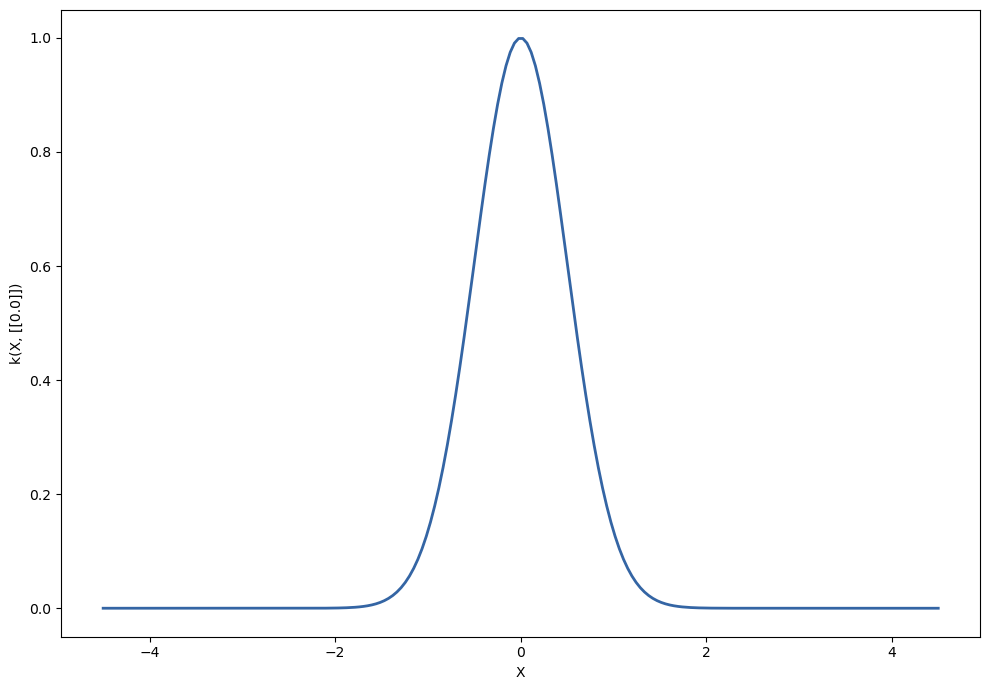

In [79]:
# Define Kernel
d = 1       # input dimension
sigma_p_sq = 1     # prior variance
h = .5 # lengthscale
k = GPy.kern.RBF(d,sigma_p_sq,h)
k.plot()
#xs = np.linspace(start = -4,stop = 4, num=1000)
#ys = sigma_p_sq* np.exp(-(xs*xs)/(2*h**2))
#plt.plot(xs,ys,'r')
#plt.show()

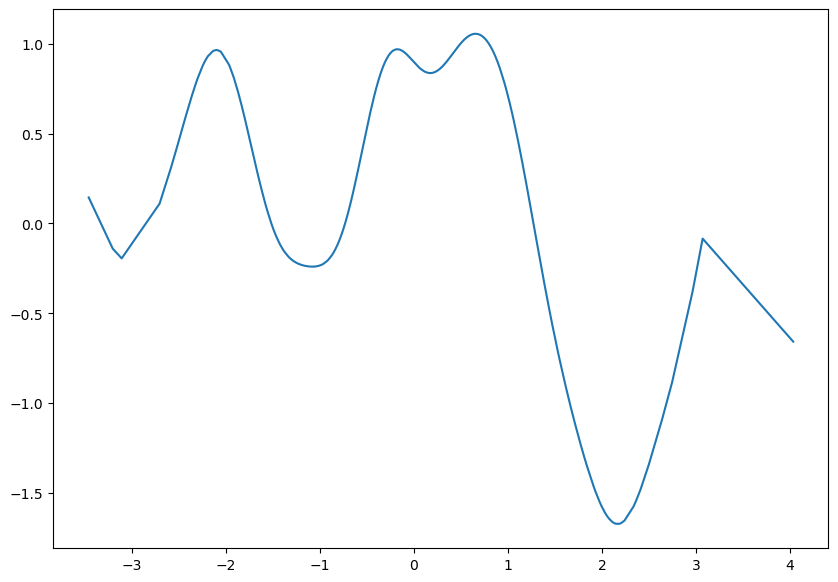

In [97]:
# Sample Xs and Functions
n_plot = 1000
n = 200
X_plot = np.random.normal(0,1,n_plot) 
X_plot = X_plot[:,None] # reshape X to make it n*D
mu = np.zeros((n_plot)) # vector of the means
K_AA = k.K(X_plot,X_plot) # covariance matrix
# Generate 20 sample path with mean mu and covariance C
f_plot = np.random.multivariate_normal(mu,K_AA)
plt.figure() # open new plotting window
plt.plot(np.sort(np.squeeze(X_plot)),np.squeeze(f_plot[np.argsort(np.transpose(X_plot))]),'-')
plt.show()
#
X = X_plot[:n]
f = f_plot[:n]

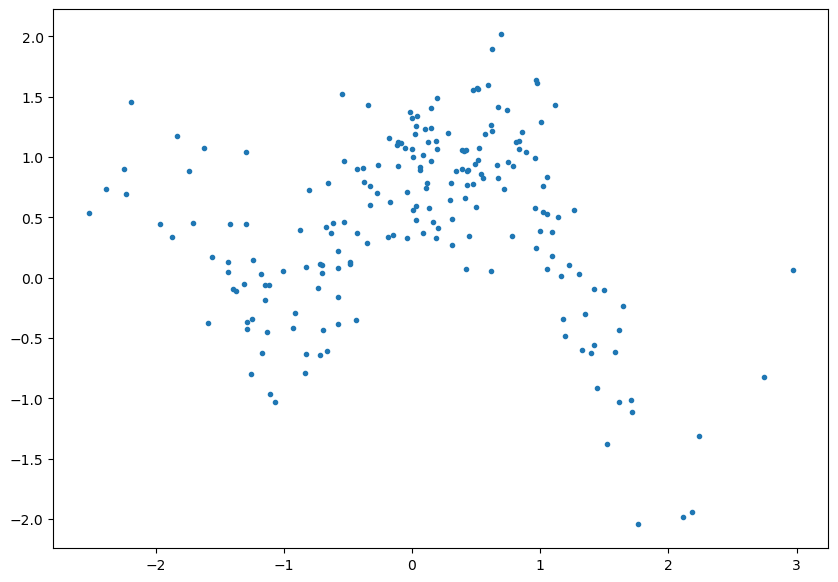

In [98]:
# Sample Data
sigma_n_sq = .2 # nosie variance
y = f + np.random.multivariate_normal(np.zeros((n)),np.eye(n)*sigma_n_sq)
y = y.reshape(-1,1)
plt.plot(X,y, '.')
plt.show()

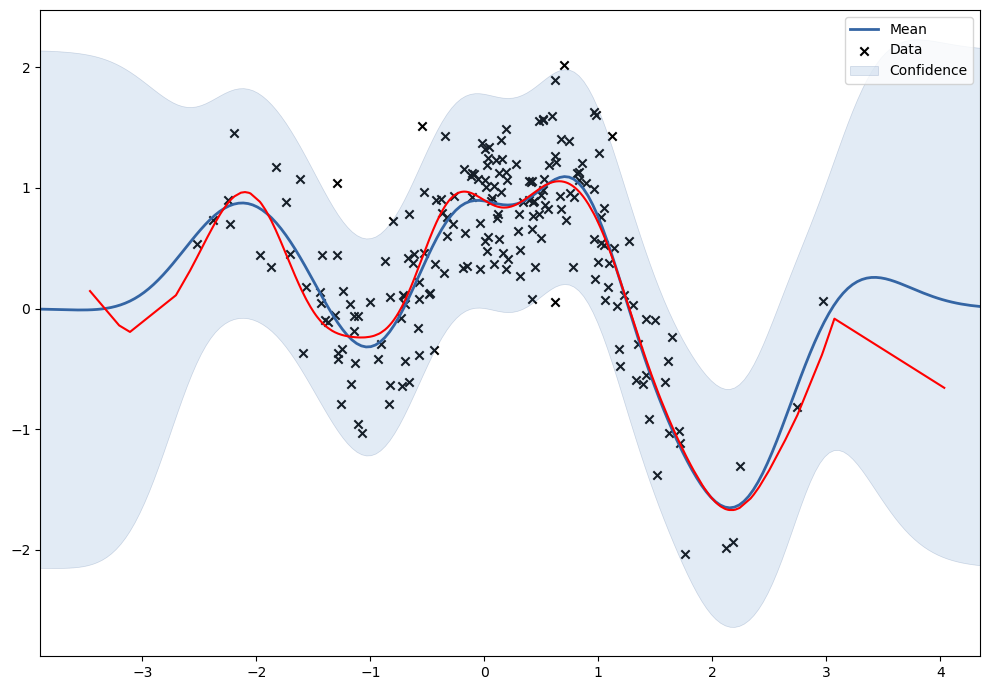

In [103]:
# Fitting a GP

# regression model
sigma_p_sq_reg = sigma_p_sq   # prior variance
h_reg = h*1 # lengthscale
sigma_n_sq_reg = sigma_n_sq


k_reg = GPy.kern.RBF(d,sigma_p_sq_reg,h_reg)

m = GPy.models.GPRegression(X = X, Y = y, kernel = k_reg, noise_var= sigma_n_sq_reg)
m.plot()
plt.plot(np.sort(np.squeeze(X_plot)),np.squeeze(f_plot[np.argsort(np.transpose(X_plot))]),'r')
plt.show()